# Исследование оттока клиентов «Метанпромбанк»

**Описание проекта:** Наш проект направлен на анализ клиентской базы регионального банка с целью выделения сегментов клиентов, которые склонны к уходу. Задача маркетингового отдела — проводить персонализированные действия для предотвращения оттока клиентов. Проект включает исследовательский анализ данных, формулировку и проверку гипотез, а также предоставление рекомендаций для маркетинга по мероприятиям, которые помогут удержать клиентов.


**Цель проекта:** Помочь маркетинговому отделу банка выделить сегменты клиентов, склонных к уходу, и предложить стратегии по удержанию этих клиентов, основываясь на результатах анализа данных.


**Задачи проекта:**

* Проанализировть клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка;

* Провести исследовательский анализ данных, определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравнить портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д);

* Сформулировть и проверить статистические гипотезы;

* Объединяя признаки отточности, сформировть сегменты, отобрать из них лучшие и дать по ним рекомендации;

* Подготовить презентацию для заказчика.

**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

* USERID — идентификатор пользователя;

* score — баллы кредитного скоринга;

* city — город;

* gender — пол;

* age — возраст;

* equity — количество баллов собственности;

* balance — баланс на счёте;

* products — количество продуктов, которыми пользуется клиент;

* credit_card — есть ли кредитная карта;

* last_activity — активный клиент;

* EST_SALARY — оценочный доход клиента;

* сhurn — признак оттока.


# Декомпонизация

**1. Загрузка данных и подготовка к исследованию**

* Загрузка данных и импорт нужнных библиотек;

* Изучить общую информацию о данных и типах столбцов;

* Проверить корректность названия столбцов;

* Рассмотреть пропуски в данных;

* Проверить наличие дубликатов;

* При наличии пропусков и дубликатов их обработать (если есть возможность);

* Провести кодирование столбцов "gender" и "city";

* Промежуточный вывод.



**2. Исследовательский анализ данных**

* Составить портрет клиентов в разрезе оттока;

* Составить портрет лояльных клиентов;

* Сравнение портретов типичных клиентов (средние и медианы);

* Распределения непрерывных, в т.ч. в разрезе оттока;

* Уровни оттока по категориям; 

* Корреляционный анализ;

* Промежуточный вывод.


**3. Проверка статистических гипотез** 

* Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались;

* Сформулировать и проверить статистические гипотезы исходя из сравнения типичных клиентов.

* Промежуточный вывод.


**4. Промежуточный итог о том, какие показатели стратегически влияют на отток**

* Определить признаки, которые наиболее существенно влияют на отток.

* Определение конкретных интервалов или значений признаков, которые связаны с повышенным риском оттока.

* Промежуточный вывод.


**5. Сегментация на основе стратегических показателей**

* Выделить 3-5 высокоотточных сегментов (отток более чем в 2 раза больше чем в банке в среднем, размер сегмента 300-2000 человек);

* Приоритизировать сегменты.

* Промежуточный вывод.


**6. Выводы и рекомендации для заказчика**

* Дать конкретные рекомендации по приоритетным сегментам.


**7. Презентация** 

* Подготовить презентацию для заказчика с результатами анализа данных.

# Оглавление

1. [Загрузка данных и подготовка к исследованию](#data)

* [Загрузка данных и импорт нужных библиотек](#import)
* [Общая информация о данных](#first-view)
* [Изменение названия столбцов](#rename)
* [Пропуски](#null)
* [Дубликаты](#duplicate)
* [Кодирование столбцов](#one-hot)
* [Промежуточный вывод по шагу 1](#con-1)

2. [Исследовательский анализ данных](#eda)

* [Сравнение портретов типичных клиентов](#port)
* [Распределение непрерывных переменных](#plot)
* [Уровни оттока по категориям](#category)
* [Корреляционный анализ](#corr)
* [Промежуточный вывод по шагу 2](#con-2)

3. [Проверка статистических гипотез](#stat)

* [Гипотеза различия дохода между отточными и лояльными клиентами](#hyp1)
* [Гипотеза различия кредитного скоринга](#hyp2)
* [Гипотеза об активных и неактивных клиентах](#hyp3)
* [Промежуточный вывод](#conc-3)

4. [Промежуточный итог о том, какие показатели стратегически влияют на отток](#strat)


5. [Сегментация на основе стратегических показателей](#segment)
* [Промежуточный вывод](#conc-5)

6. [Итоговый вывод](#conclusion)

7. [Презентация](#pres)

## Загрузка данных и подготовка к исследованию

<a id='data'></a>

### Загрузка данных и импорт нужнных библиотек

<a id='import'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [2]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

### Общая информация о данных

<a id='first-view'></a>

In [3]:
def data_first_view(data):
    """
    Данная функция позволяет ознакомиться с первичной информацией о датасете
    """
    # Вывод первых 10 строк
    print('*' * 50)
    print("Первые 10 строк данных:")
    display(data.head(10))
    
    # Информация о данных
    print('*' * 50)
    print("\nИнформация о данных:")
    display(data.info())
    
    # Имена столбцов
    print('*' * 50)
    print("\nИмена столбцов:")
    display(data.columns)
    
    # Описательная статистика
    print('*' * 50)
    print("\nОписательная статистика:")
    display(data.describe())
    
    # Количество пропущенных значений
    print('*' * 50)
    print("\nКоличество пропущенных значений в каждом столбце:")
    display(data.isna().sum())
    
    # Количество дубликатов
    print('*' * 50)
    print("\nКоличество дубликатов:")
    display(data.duplicated().sum())

In [4]:
data_first_view(data)

**************************************************
Первые 10 строк данных:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

**************************************************

Имена столбцов:


Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

**************************************************

Описательная статистика:


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


**************************************************

Количество пропущенных значений в каждом столбце:


USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

**************************************************

Количество дубликатов:


0

Ознакомившись с первичной информацией о данных мы видим следующее:

* У нас представлены данныо о 10 000 клиентах

* Типы данных у столбцов корректные

* Стоит изменить названия столбцов для удобной работы (USERID, EST_SALARY)

* Пропуски присутствуют в двух столбцах: age (26 штук), balance(2 295 штук)

* Явных дубликатов в датасете нет

### Изменение названия столбцов

<a id='rename'></a>

In [5]:
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Пропуски

<a id='null'></a>

Проверка пропусков. В части пропусков здесь можно пользоваться общепринятой классификацией пропусков:

MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;

MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;

MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

In [6]:
# Создаем индикаторные переменные для пропусков
data['missing_age'] = data['age'].isna().astype(int)
data['missing_balance'] = data['balance'].isna().astype(int)
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_age,missing_balance
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,0,1
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,0,1
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,0,0


Рассмотим процент пропусков по отношению к общему количеству записей для столбцов *balance* и *age*.

In [7]:
percent_missing_balance = len(data.query('missing_balance == 1')) / len(data) * 100
percent_missing_age = len(data.query('missing_age == 1')) / len(data) * 100
print(f'Процент пропусков для столбца balance: {percent_missing_balance}%')
print(f'Процент пропусков для столбца age: {percent_missing_age}%')

Процент пропусков для столбца balance: 22.95%
Процент пропусков для столбца age: 0.26%


Видим, что количество пропусков в столбце balance довольно большое. Для начала разберемся к какому типу они относятся.

In [8]:
# Создание сводной таблицы с агрегатными функциями для всех признаков
def missing_pivot(index):
    pivot_table = pd.pivot_table(
    data, 
    index=index,  # Столбец для разделения данных
    aggfunc={                 
        'user_id': 'count',   # Количество пользователей
        'balance': 'mean',    # Значение баланса
        'score': 'mean',      # Среднее кредитного скоринга
        'age': 'mean',        # Средний возраст
        'equity': 'mean',     # Среднее количество баллов собственности
        'products': 'mean',   # Среднее количество продуктов
        'est_salary': 'mean', # Средний оценочный доход
        'city': lambda x: x.mode()[0],          # Мода для города
        'gender': lambda x: x.mode()[0],        # Мода для пола
        'credit_card': lambda x: x.mode()[0],   # Мода для кредитной карты
        'last_activity': lambda x: x.mode()[0], # Мода для активности
        'churn': lambda x: x.mode()[0]          # Мода для признака оттока
        }
    ).reset_index()
    return pivot_table




In [9]:
missing_balance_pivot = missing_pivot(data['missing_balance'])
missing_balance_pivot

,missing_balance,age,balance,churn,city,credit_card,equity,est_salary,gender,last_activity,products,score,user_id
0,0,42.924366,827794.30651,0,Ярославль,1,3.395068,124501.872366,Ж,1,2.080986,843.73926,7705
1,1,42.093023,NaN,0,Ярославль,1,0.050980,226310.208654,М,1,1.162092,865.35207,2295


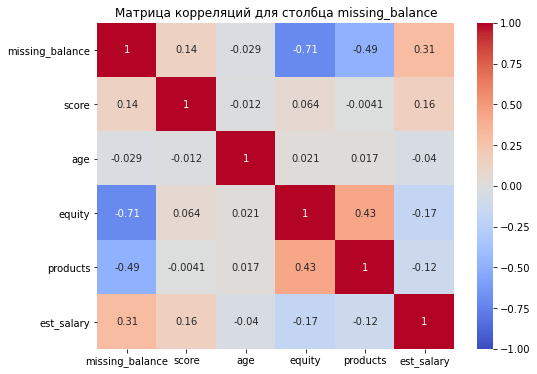

In [10]:
# Выбираем числовые столбцы для корреляции
numeric_columns = ['missing_balance', 'score', 'age', 'equity', 'products', 'est_salary']

# Создаём матрицу корреляций
correlation_matrix = data[numeric_columns].corr()

# Отображаем матрицу корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляций для столбца missing_balance")
plt.show()

Проводя анализ пропущенных значений по балансу клиента мы видим, что пропуски связаны с рядом других признаков - количество продуктов, приблизительная оценка собственности, доход и пол.

В этом случае пропуски можно охарактеризовать как MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

In [11]:
missing_balance_pivot = missing_pivot(data['missing_age'])
missing_balance_pivot

,missing_age,age,balance,churn,city,credit_card,equity,est_salary,gender,last_activity,products,score,user_id
0,0,42.734409,8.272456e+05,0,Ярославль,1,2.630840,147786.809731,М,1,1.871466,848.682575,9974
1,1,NaN,1.250034e+06,0,Ярославль,1,1.384615,178585.199231,М,1,1.346154,855.153846,26


Если рассматривать пропуски по столбцу age, то видим, что пропуски связаны с балансом, оценкой собственности и доходом. 

Так как процент пропусков очень мал, считаю, что их можно удалить. 

In [12]:
data = data.dropna(subset=['age'])

In [13]:
data.isna().sum()

user_id               0
score                 0
city                  0
gender                0
age                   0
equity                0
balance            2279
products              0
credit_card           0
last_activity         0
est_salary            0
churn                 0
missing_age           0
missing_balance       0
dtype: int64

### Дубликаты

<a id='duplicate'></a>

Ранее мы выяснили, что в нашем датасете явных дубликатов нет, однако стоит рассмотреть неявные дубликаты по столбцу *user_id*.

In [14]:
data.duplicated('user_id', keep=False).sum()

100

Всего у нас 100 дубликатов, попробуем разобраться совпадают ли они по дургим столбцам, которые могут охарактеризовать клиента (город, пол, возраст).

In [15]:
duplicates = data[data.duplicated('user_id', keep=False)]
duplicates

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_age,missing_balance
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1,0,0
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1,0,0
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1,0,0
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1,0,0
690,152479,768.0,Рыбинск,Ж,42.0,0,126787.79,4,1,1,143233.23,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,195884,767.0,Рыбинск,Ж,45.0,1,335652.56,3,1,1,100197.67,0,0,0
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0,0,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0,0,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0,0,0


In [16]:
duplicates[['user_id', 'city', 'gender', 'age']].duplicated().sum()

0

Если рассматривать клиентов в разрезе города, пола и возраста, то мы видим, что дубликатов по *user_id* нет. В дальнейшем столбец *user_id* нам не понадобится, поэтому можно его удалить.

In [17]:
data = data.drop('user_id', axis=1, inplace=False)

In [18]:
data.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_age,missing_balance
0,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,0
1,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,0
2,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1
3,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0
4,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0


Также важно помнить, что в нашем датасете только актуальные данные, т.е. все клиенты на данный момент являются действующими, а значит у них есть минимум один продукт.

In [19]:
data.query('products == 0')

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_age,missing_balance
8957,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,0,1


Одна запись не соответствует этому условию, поэтому удалим её.

In [20]:
data = data.query('products != 0')

### Кодирование столбцов "gender" и "city"

<a id='one-hot'></a>

In [21]:
data = data.copy()

# Присваиваем значения для dummy-переменных
data['dum_city'] = data['city']
data['dum_gender'] = data['gender']

# Преобразуем категориальные переменные в dummy-переменные
data = pd.get_dummies(data, columns=['dum_city', 'dum_gender'], prefix='', prefix_sep='')

In [22]:
data

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_age,missing_balance,Ростов,Рыбинск,Ярославль,Ж,М
0,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,0,0,1,0,1,0
1,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,0,0,1,0,1,0
2,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,1,0
3,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,0,1,1,0
4,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,0,0,1,0,0,1
9996,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,0,1,0,0,1,0,1
9997,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,0,1,0,0,1,0,1
9998,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,0,0,0,0,1,1,0


Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным, можно применить one-hot кодирование. Теперь у нас есть отдельные столбцы с обозначением города и пола.

**Промежуточный вывод по шагу 1:**

<a id='con-1'></a>

1) В нашем датасете представлены данные о 10 000 клиентах. Типы данных у столбцов корректные, однако, стоит изменить названия столбцов для удобной работы (USERID, EST_SALARY), также у нас присутствуют пропуски в двух столбцах (age - 26 штук и balance - 2 295 штук). Явных дубликатов в датасете нет. 

2) Если говорить о пропусках, то процент пропусков для столбца balance: 22.95%, процент пропусков для столбца age: 0.26%. Проводя анализ пропущенных значений по балансу клиента мы видим, что пропуски связаны с рядом других признаков - количество продуктов, приблизительная оценка собственности, доход и пол. В этом случае пропуски можно охарактеризовать как MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям. Пропуски в столбце age были удалены, так как их очень мало и на исследование они не повлияют.

3) В датасете есть неявные дубликаты по столбцу user_id. Всего у нас 100 таких строк. Если рассматривать клиентов в разрезе города, пола и возраста, то мы видим, что дубликатов по user_id нет. В дальнейшем столбец user_id нам не понадобится, поэтому можно его удалить.

4) Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным, можно применить one-hot кодирование для столбцов city и gender. Теперь у нас есть отдельные столбцы с обозначением города и пола.

## Исследовательский анализ

<a id='eda'></a>

### Сравнение портретов типичных клиентов

<a id='port'></a>

In [23]:
churn_client = data.query('churn == 1')
loyal_client = data.query('churn == 0')

In [29]:
churn_metric = data.groupby(['churn']).agg({'score': 'mean', 'age': 'mean', 'equity': 'median', 
                                           'balance': 'mean', 'products': 'median', 
                                           'est_salary': 'mean', 'credit_card': 'median', 
                                           'last_activity': 'median', 'city': pd.Series.mode,
                                          'gender': pd.Series.mode}).reset_index()
churn_metric.columns = [
    'Отток', 
    'Скоринг', 'Возраст', 'Баллы_собственности', 'Баланс',
    'Продуктов', 'Доход',
    'Кредитная_карта', 'Активность', 'Город', 'Пол'
]
churn_metric

,Отток,Скоринг,Возраст,Баллы_собственности,Баланс,Продуктов,Доход,Кредитная_карта,Активность,Город,Пол
0,0,845.396199,43.020846,3,7.330316e+05,2,147674.637881,1,0,Ярославль,Ж
1,1,863.361936,41.429593,4,1.134458e+06,2,148357.483157,1,1,Ярославль,М


Всего у нас 1 819 клиентов, которые уходят, и 8 155 клиентов, которые остаются клиентами банка.


1) Баллы кредитного скоринга (score):

* У ушедших клиентов в среднем баллы выше (863.42) по сравнению с лояльными (845.40). Медиана также выше у ушедших клиентов.


2) Возраст (age):

* Ушедшие клиенты в среднем младше (41.45 лет) по сравнению с лояльными (43.02 лет).


3) Количество баллов собственности (equity):

* Ушедшие клиенты в среднем имеют больше баллов (3.76) по сравнению с лояльными (2.38). Медиана также выше у ушедших клиентов.

3) Баланс (balance):

* Ушедшие клиенты имеют в среднем более высокий баланс (1 134 458) по сравнению с лояльными (733 031,6). Медиана также выше у ушедших клиентов.

4) Количество продуктов (products):

* Ушедшие клиенты пользуются в среднем большим количеством продуктов (2.38) по сравнению с лояльными (1.76). Медиана у ушедших клиентов и лояльных клиентов одинаковая - 2.0.

5) Оценочный доход (est_salary):

* Ушедшие клиенты в среднем имеют чуть больший оценочный доход (148 290) по сравнению с лояльными (147 674). Медиана тоже выше у ушедших клиентов.

6) Кредитная карта (credit_card):

* Медианы для лояльных и ушедших идентичны, что говорит о схожем распределении пользователей кредитной карты среди клиентов.

7) Активный клиент (last_activity):

* Удивительно, но у уходящих клиентов медиана равна 1, а у лояльных 0.

8) Город (city) и пол (gender): 

* Если говорить о городе проживания ушедших и лояльных клиентов, то это Ярославль. Ушедшие клиенты в основном мужчины, а лояльные - женщины. 

Лояльный клиент банка в среднем старше (43.02 лет) и имеет более низкий кредитный скоринг (845.40) по сравнению с уходящими клиентами. Он имеет меньший баланс на счете (733 031,6) и меньшее количество баллов собственности (2.38). Оценочный доход у лояльных клиентов немного ниже (147 674), а активность в системе в основном 0. Лояльные клиенты в основном женщины, город проживания - Ярославль.

Уходящий клиент моложе (41.45 лет) и имеет более высокий кредитный скоринг (863.42). Он имеет более высокий баланс на счете (1 134 458) и больше баллов собственности (3.76). Оценочный доход у уходящих клиентов чуть выше (148 290), и они имеют большую активность в системе. Уходящие клиенты в основном мужчины, город проживания также Ярославль. Количество продуктов схожее.

### Распределения непрерывных

<a id='plot'></a>

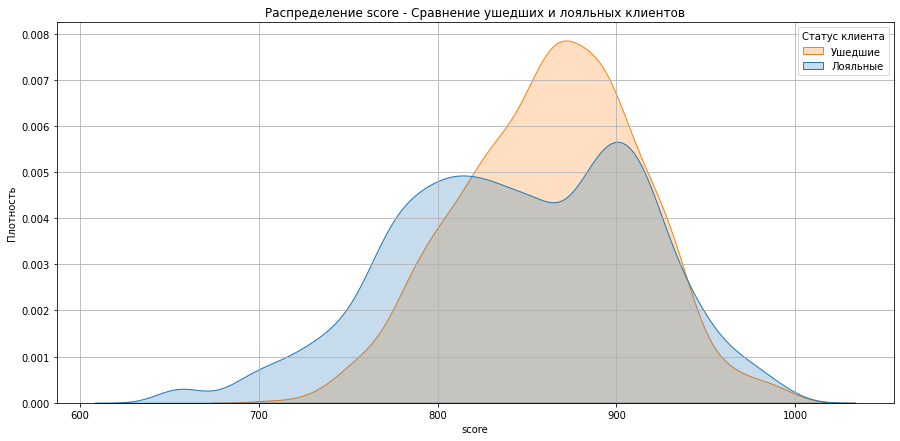

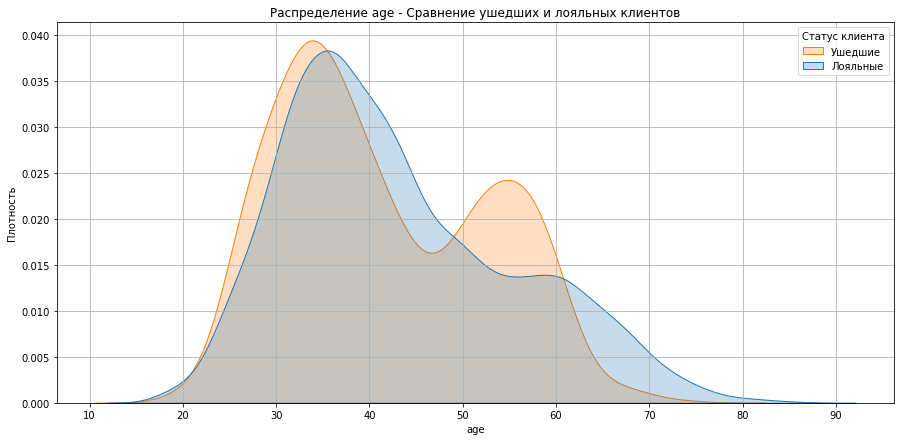

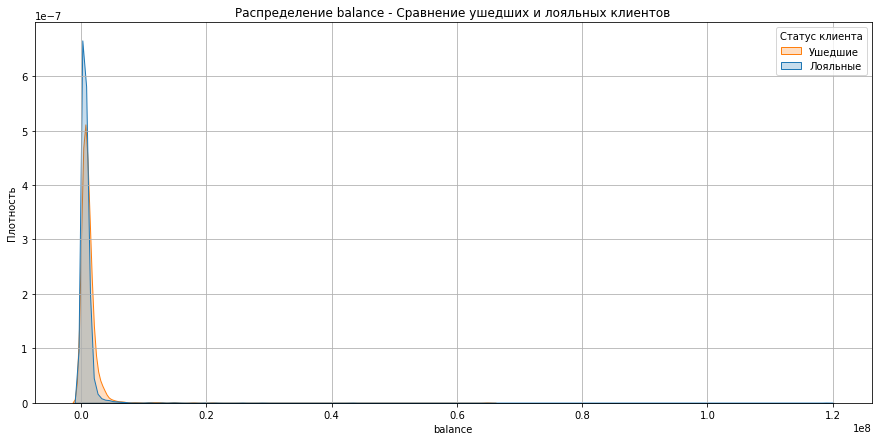

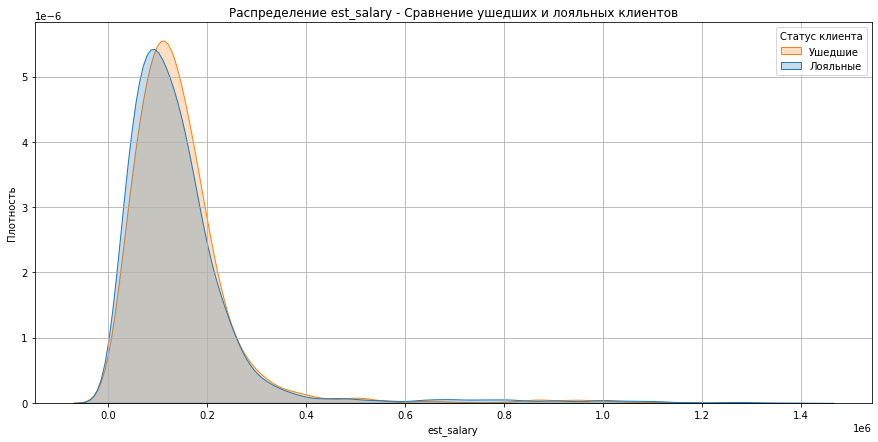

In [30]:
def difference_kde(data, column_name, title):
    """
    Функция позволяет строить kdeplot, чтобы нивелировать разницы в размерах групп.
    """
    plt.figure(figsize=(15, 7))
    
    # Построение KDE графика для разных классов
    sns.kdeplot(data=data, x=column_name, hue='churn', common_norm=False, hue_order=[0, 1], fill=True)

    # Настройка легенды
    plt.legend(title='Статус клиента', loc='upper right', labels=['Ушедшие', 'Лояльные'])
    
    plt.title(f'Распределение {column_name} - {title}')
    plt.xlabel(column_name)
    plt.ylabel('Плотность')
    plt.grid(True)
    plt.show()

# Список столбцов для построения KDE графиков
kde_columns = ['score', 'age', 'balance', 'est_salary']

# Построение графиков для каждого столбца
for column in kde_columns:
    difference_kde(data, column, 'Сравнение ушедших и лояльных клиентов')


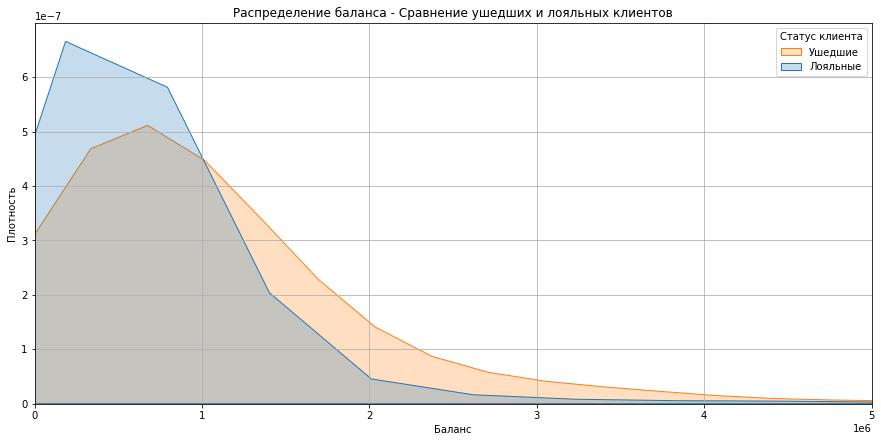

In [31]:
plt.figure(figsize=(15, 7))

# KDE график для баланса
sns.kdeplot(data=data, x='balance', hue='churn', common_norm=False, hue_order=[0, 1], fill=True)

# Настройка легенды
plt.legend(title='Статус клиента', loc='upper right', labels=['Ушедшие', 'Лояльные'])

# Добавление ограничений по оси X
plt.xlim(0, 5e6)

plt.title('Распределение баланса - Сравнение ушедших и лояльных клиентов')
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

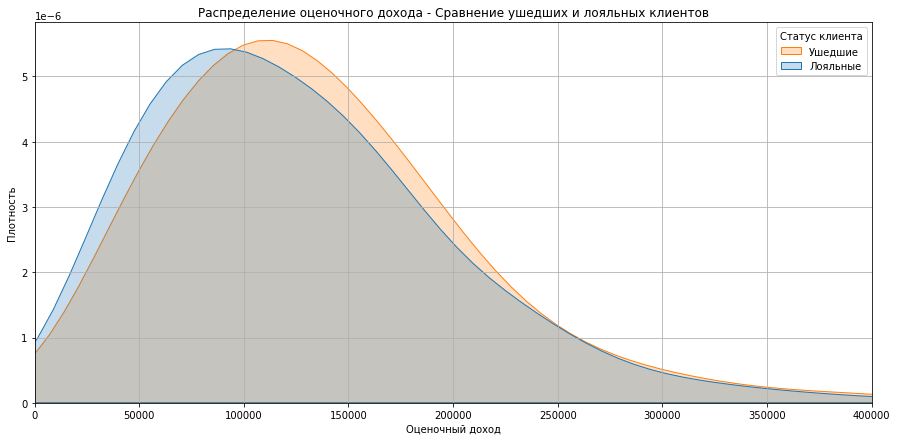

In [32]:
plt.figure(figsize=(15, 7))

# KDE график для оценочного дохода
sns.kdeplot(data=data, x='est_salary', hue='churn', common_norm=False, hue_order=[0, 1], fill=True)

# Настройка легенды
plt.legend(title='Статус клиента', loc='upper right', labels=['Ушедшие', 'Лояльные'])

# Добавление ограничений по оси X
plt.xlim(0, 4e5)

plt.title('Распределение оценочного дохода - Сравнение ушедших и лояльных клиентов')
plt.xlabel('Оценочный доход')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

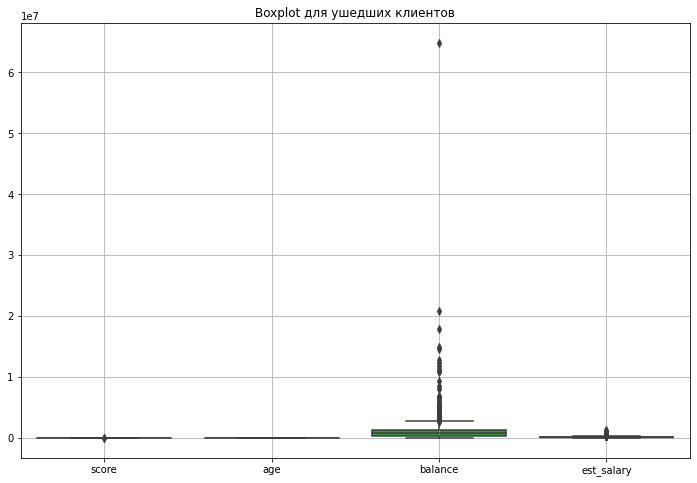

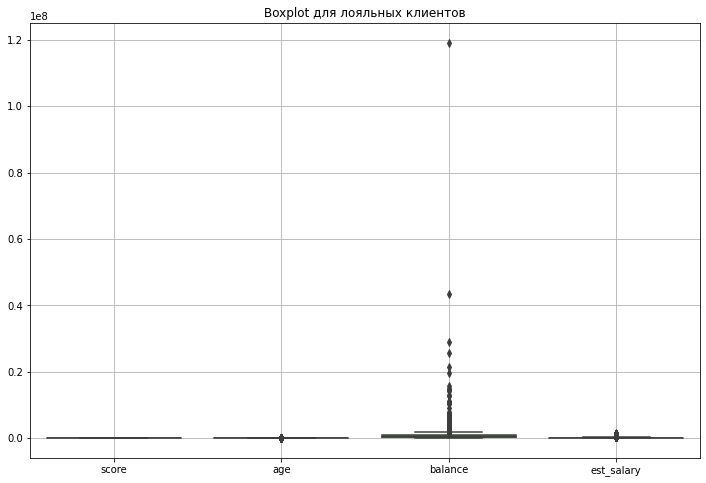

In [33]:
# Построение boxplot для ушедших клиентов
plt.figure(figsize=(12, 8))
sns.boxplot(data=churn_client[['score', 'age', 'balance','est_salary']])
plt.title('Boxplot для ушедших клиентов')
plt.grid(True)
plt.show()

# Построение boxplot для лояльных клиентов
plt.figure(figsize=(12, 8))
sns.boxplot(data=loyal_client[['score', 'age', 'balance','est_salary']])
plt.title('Boxplot для лояльных клиентов')
plt.grid(True)
plt.show()

Рассматривая графики распределения непрерывных величин видим следующее:

* У ушедших клиентов значения кредитного скоринга выше, чем у лояльных. Основные значения у ушедших находятся в диапазоне от 820 до 920, в то время как у лояльных клиентов есть два пика, и основные значения охватывают диапазон от 750 до 930. Интересно отметить, что более высокие баллы кредитного скоринга не гарантируют лояльность клиентов. Это может говорить о том, что клиенты с высокими кредитными баллами могут быть более подвержены оттоку.

* В возрастной группе от 22 до 37 лет плотность ушедших клиентов выше, что указывает на большую вероятность оттока среди более молодых клиентов. В диапазоне от 37 до 49 лет кривая лояльных клиентов выше, что свидетельствует о более высокой доле лояльных клиентов в этом возрасте. Начиная с 49 до 62 лет, снова наблюдается повышение плотности ушедших клиентов, что указывает на рост вероятности оттока в этой возрастной группе. Таким образом, клиенты в возрастных диапазонах 22–37 и 49–62 лет более склонны к оттоку, тогда как клиенты от 37 до 49 лет чаще остаются лояльными.
    
* На графике ядерной оценки плотности видно, что доля лояльных клиентов выше при значениях баланса до 1 млн, так как синяя кривая располагается выше в этом интервале. Однако для значений баланса выше 1 млн наблюдается обратная ситуация — плотность ушедших клиентов возрастает, что может свидетельствовать о том, что клиенты с более высоким балансом (свыше 1 млн) более склонны к оттоку.

* По графику KDE для доходов можно заметить, что до уровня 90,000 преобладают лояльные клиенты, так как синяя кривая находится выше. Однако начиная с доходов выше 90,000, плотность ушедших клиентов становится выше, что указывает на большую вероятность оттока среди клиентов с более высокими доходами.

* В столбцах balance и EST_SALARY наблюдается большое количество выбросов, что может искажать общую картину. Выбросы в значениях баланса и зарплат могут указывать на специфические группы клиентов, которые стоит анализировать отдельно.

### Уровни оттока по категориям

<a id='category'></a>

In [34]:
def create_pivot_table(df, category_col, value_col='churn', aggfunc='mean'):
    """
    Функция для создания сводной таблицы для уровня оттока по категории.
    """
    pivot_table = df.pivot_table(index=category_col, values=value_col, aggfunc=aggfunc).reset_index()
    return pivot_table

In [35]:
city_churn = create_pivot_table(data, 'city')
city_churn.columns = ['Город', 'Средний уровень оттока']
city_churn

,Город,Средний уровень оттока
0,Ростов,0.187147
1,Рыбинск,0.162565
2,Ярославль,0.190128


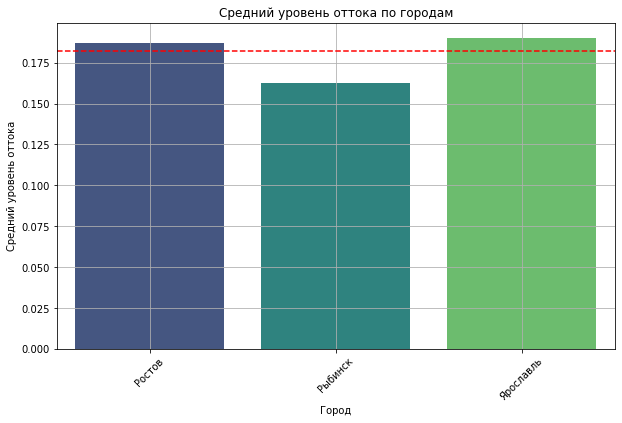

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Город', y='Средний уровень оттока', data=city_churn, palette='viridis')
plt.xlabel('Город')
plt.ylabel('Средний уровень оттока')
plt.title('Средний уровень оттока по городам')
plt.grid(True)
plt.xticks(rotation=45)
plt.axhline(data['churn'].mean(), linestyle='--', color='red')
plt.show()

* Наивысший уровень оттока наблюдается в Ярославле (19.0%). Это может указывать на то, что клиенты в этом городе имеют более высокий риск ухода по сравнению с другими городами. 

* Ростов показывает уровень оттока в 18.7%, который довольно близок к Ярославлю. Этот показатель может быть связан с локальными особенностями и требует дальнейшего анализа для выработки стратегий по удержанию клиентов.

* Самый низкий уровень оттока зафиксирован в Рыбинске - 16.3%. Возможно, стоит изучить успешные практики Рыбинска для применения в других городах.

In [37]:
gender_churn = create_pivot_table(data, 'gender')
gender_churn.columns = ['Пол', 'Средний уровень оттока']
gender_churn

,Пол,Средний уровень оттока
0,Ж,0.127459
1,М,0.237027


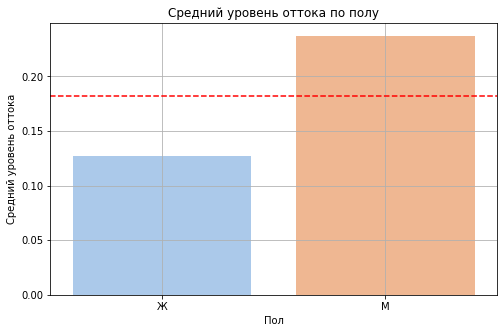

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Пол', y='Средний уровень оттока', data=gender_churn, palette='pastel')
plt.xlabel('Пол')
plt.ylabel('Средний уровень оттока')
plt.grid(True)
plt.axhline(data['churn'].mean(), linestyle='--', color='red')
plt.title('Средний уровень оттока по полу')
plt.show()

* Мужчины более склонны к уходу, их средний уровень оттока составляет 23.7%, у женщин уровень оттока равен 12.7%. Это ситуация может быть связана с различиями в потребительских предпочтениях или удовлетворенности услугами.

In [39]:
pivot_credit = create_pivot_table(data, 'credit_card')
pivot_credit.columns = ['Наличие кредитной карты', 'Средний уровень оттока']
pivot_credit

,Наличие кредитной карты,Средний уровень оттока
0,0,0.255566
1,1,0.147848


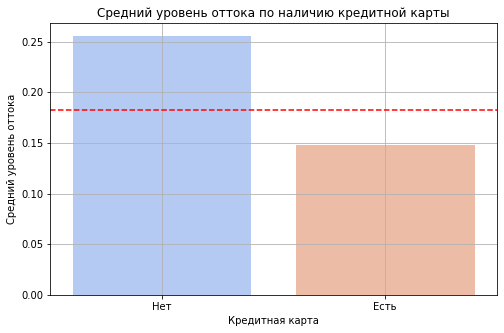

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Наличие кредитной карты', y='Средний уровень оттока', data=pivot_credit, palette='coolwarm')
plt.xlabel('Кредитная карта')
plt.grid(True)
plt.ylabel('Средний уровень оттока')
plt.title('Средний уровень оттока по наличию кредитной карты')
plt.axhline(data['churn'].mean(), linestyle='--', color='red')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Есть'])
plt.show()

* Клиенты, не имеющие кредитной карты, имеют более высокий риск ухода (25.6%), возможно из-за недостатка услуг или предложений, связанных с кредитными картами. Средний уровень оттока у клиентов, которые имеют кредитную карту, существенно ниже (14.8%).

In [41]:
pivot_activity = create_pivot_table(data, 'last_activity')
pivot_activity.columns = ['Статуст активности клиента', 'Средний уровень оттока']
pivot_activity

,Статуст активности клиента,Средний уровень оттока
0,0,0.113703
1,1,0.244871


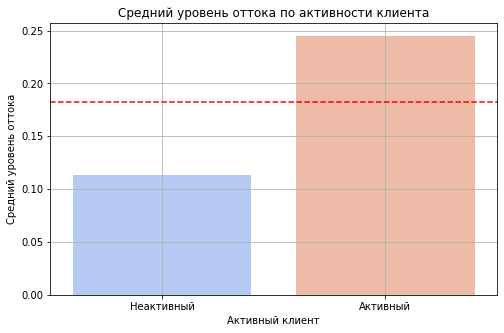

In [42]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Статуст активности клиента', y='Средний уровень оттока', data=pivot_activity, palette='coolwarm')
plt.xlabel('Активный клиент')
plt.ylabel('Средний уровень оттока')
plt.title('Средний уровень оттока по активности клиента')
plt.axhline(data['churn'].mean(), linestyle='--', color='red')
plt.grid(True)
plt.xticks(ticks=[0, 1], labels=['Неактивный', 'Активный'])
plt.show()

* Высокий уровень оттока среди активных клиентов (24.5%) может указывать на то, что они могут быть перегружены, недовольны определенными аспектами обслуживания или предложений. Средний уровень оттока по банку среди неактивных клиентов около 11.4%.

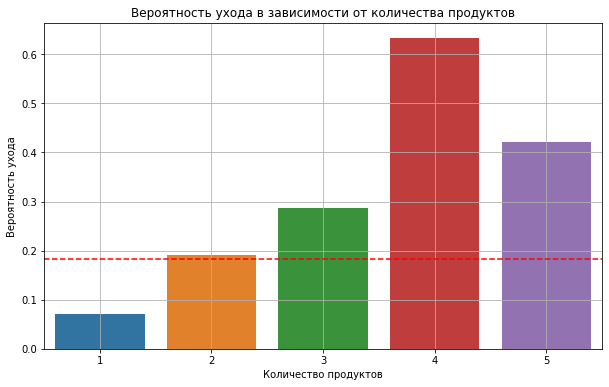

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Количество продуктов', y='Средний уровень оттока', data=pivot_product)
plt.xlabel('Количество продуктов')
plt.ylabel('Вероятность ухода')
plt.title('Вероятность ухода в зависимости от количества продуктов')
plt.axhline(data['churn'].mean(), linestyle='--', color='red')
plt.grid(True)
plt.show()

По мере роста количества используемых продуктов, растет и вероятность ухода клиентов. Самая высокая вероятность ухода, когда у человека 4 продукта.

In [46]:
pivot_equity = create_pivot_table(data, 'equity')
pivot_equity.columns = ['Количество баллов собственности', 'Средний уровень оттока']
pivot_equity

,Количество баллов собственности,Средний уровень оттока
0,0,0.034938
1,1,0.120310
2,2,0.157945
3,3,0.208442
4,4,0.251218
5,5,0.300783
6,6,0.360248
7,7,0.462500
8,8,0.352941
9,9,0.538462


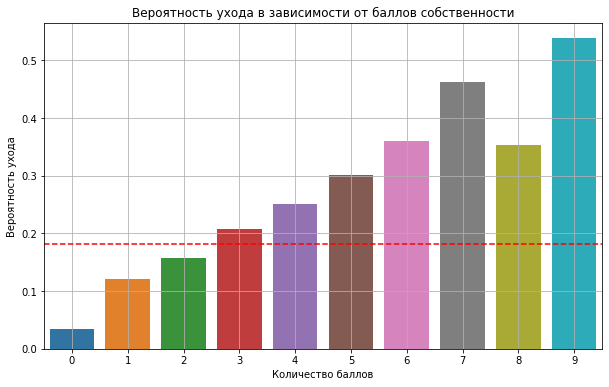

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Количество баллов собственности', y='Средний уровень оттока', data=pivot_equity)
plt.xlabel('Количество баллов')
plt.ylabel('Вероятность ухода')
plt.title('Вероятность ухода в зависимости от баллов собственности')
plt.axhline(data['churn'].mean(), linestyle='--', color='red')
plt.grid(True)
plt.show()

Видим, что по мере увеличения баллов собственности увеличивается и вероятность ухода клиента. Самый высокий уровень оттока у клиентов с 9 баллами - 53.8%.

### Корреляционный анализ

<a id='corr'></a>


In [48]:
data.columns

Index(['score', 'city', 'gender', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'est_salary', 'churn', 'missing_age',
       'missing_balance', 'Ростов', 'Рыбинск', 'Ярославль', 'Ж', 'М'],
      dtype='object')

In [49]:
corr_matrix = data[['score', 'age', 'equity', 
                   'balance', 'products', 'credit_card', 
                   'last_activity', 'est_salary', 'churn', 
                   'Ростов', 'Рыбинск', 'Ярославль', 
                   'Ж', 'М']].corr()

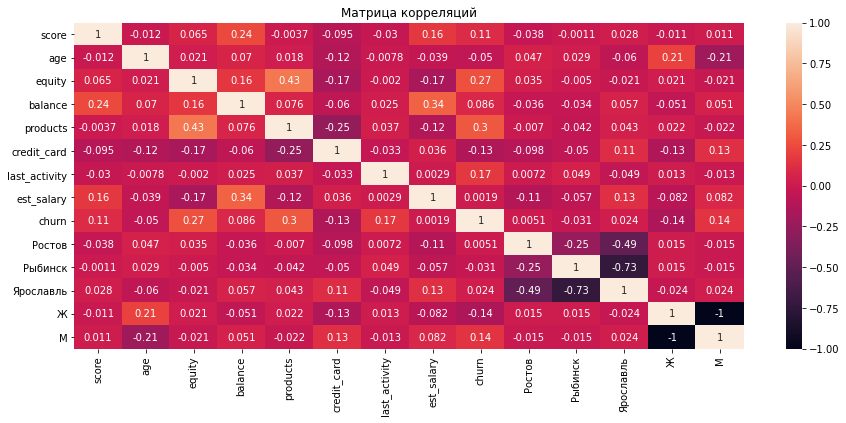

In [50]:
# Отображаем матрицу корреляций
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()

Для оценки силы связи в теории корреляции применяется шкала английского статистика Чеддока: слабая — от 0,1 до 0,3; умеренная — от 0,3 до 0,5; заметная — от 0,5 до 0,7; высокая — от 0,7 до 0,9; весьма высокая (сильная) — от 0,9 до 1,0.

Если рассматривать свзяь с оттоком, то высокой корреляции между остальными признаками нет. Но стоит выделить следующие признаки по имеющимся коэффициентам корреляции: 

* Баллы кредитного рейтинга (0.11)

* Количество баллов собственности (0.27)

* Количество продуктов (0.3)

* Активность клиента (0.17)

* Пол клиента (У мужчин 0.14, у женщин -0.14) 

* Наличие кредитной карты (-0.13)

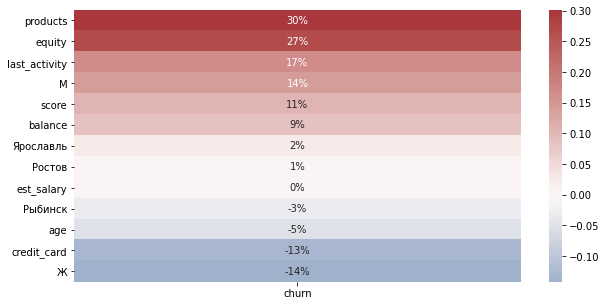

In [51]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix.loc[:, ['churn']].drop('churn').sort_values('churn', ascending=False),
    annot=True, fmt=".0%", cmap="vlag", center=0)
plt.show()

<a id='con-2'></a>

**Промежуточный вывод по шагу 2:**

1) Характеристики лояльных и отточных клиентов

* Лояльный клиент банка в среднем старше (43.02 лет) и имеет более низкий кредитный скоринг (845.40) по сравнению с уходящими клиентами. Он пользуется меньшим количеством продуктов (в среднем 1.76) и имеет меньший баланс на счете (733 031,6) и меньшее количество баллов собственности (2.38). Оценочный доход у лояльных клиентов немного ниже (147 674), неактивны в системе. Лояльные клиенты в основном женщины, город проживания - Ярославль.

* Уходящий клиент моложе (41.45 лет) и имеет более высокий кредитный скоринг (863.42). Он пользуется большим количеством продуктов (в среднем 2.38) и имеет более высокий баланс на счете (1 134 458) и больше баллов собственности (3.76). Оценочный доход у уходящих клиентов чуть выше (148 290), и они имеют большую активность в системе. Уходящие клиенты в основном мужчины, город проживания также Ярославль.

2) Распределение непрерывных величин видим следующее:

* Плотность ушедших клиентов выше в диапазоне от 820 до 920 баллов кредитного скоринга. В этом диапазоне оранжевая кривая (ушедшие клиенты) располагается выше синей (лояльные клиенты), что указывает на повышенную долю оттока среди клиентов с кредитным скорингом в этом диапазоне. Лояльные клиенты занимают более широкий диапазон от 750 до 930, но при этом их плотность ниже в критическом интервале (820–920). Это может свидетельствовать о том, что клиенты с более высокими кредитными баллами подвержены большему риску оттока.

* В возрастной группе от 22 до 37 лет плотность ушедших клиентов выше, что указывает на большую вероятность оттока среди более молодых клиентов. В диапазоне от 37 до 49 лет кривая лояльных клиентов выше, что свидетельствует о более высокой доле лояльных клиентов в этом возрасте. Начиная с 49 до 62 лет, снова наблюдается повышение плотности ушедших клиентов, что указывает на рост вероятности оттока в этой возрастной группе. Таким образом, клиенты в возрастных диапазонах 22–37 и 49–62 лет более склонны к оттоку, тогда как клиенты от 37 до 49 лет чаще остаются лояльными.

* На графике ядерной оценки плотности видно, что доля лояльных клиентов выше при значениях баланса до 1 млн, так как синяя кривая располагается выше в этом интервале. Однако для значений баланса выше 1 млн наблюдается обратная ситуация — плотность ушедших клиентов возрастает, что может свидетельствовать о том, что клиенты с более высоким балансом (свыше 1 млн) более склонны к оттоку.

* По графику KDE для доходов можно заметить, что до уровня 90,000 преобладают лояльные клиенты, так как синяя кривая находится выше. Однако начиная с доходов выше 90,000, плотность ушедших клиентов становится выше, что указывает на большую вероятность оттока среди клиентов с более высокими доходами.

* В столбцах balance и EST_SALARY наблюдается большое количество выбросов, что может искажать общую картину. Выбросы в значениях баланса и зарплат могут указывать на специфические группы клиентов, которые стоит анализировать отдельно.

3) Уровни оттока по категориям:

* Наивысший уровень оттока наблюдается в Ярославле (19.0%). Это может указывать на то, что клиенты в этом городе имеют более высокий риск ухода по сравнению с другими городами. Ростов показывает уровень оттока в 18.7%, который довольно близок к Ярославлю. Этот показатель может быть связан с локальными особенностями и требует дальнейшего анализа для выработки стратегий по удержанию клиентов. Самый низкий уровень оттока зафиксирован в Рыбинске - 16.3%. Возможно, стоит изучить успешные практики Рыбинска для применения в других городах.

* Мужчины более склонны к уходу, их средний уровень оттока составляет 23.7%, у женщин уровень оттока равен 12.7%. Это ситуация может быть связана с различиями в потребительских предпочтениях или удовлетворенности услугами.

* Клиенты, не имеющие кредитной карты, имеют более высокий риск ухода (25.6%), возможно из-за недостатка услуг или предложений, связанных с кредитными картами. Средний уровень оттока у клиентов, которые имеют кредитную карту, существенно ниже (14.8%).

* Высокий уровень оттока среди активных клиентов (24.5%) может указывать на то, что они могут быть перегружены, недовольны определенными аспектами обслуживания или предложений. Средний уровень оттока по банку среди неактивных клиентов около 11.4%.

* По мере роста количества используемых продуктов, растет и вероятность ухода клиентов. Самая высокая вероятность ухода, когда у человека 4 продукта (63.3%).

* По мере увеличения баллов собственности увеличивается и вероятность ухода клиента. Самый высокий уровень оттока у клиентов с 9 баллами - 53.8%.

4) Корреляционный анализ

* Если рассматривать свзяь с оттоком, то высокой корреляции между остальными признаками нет. Но стоит выделить следующие признаки по имеющимся коэффициентам корреляции:

    * Баллы кредитного рейтинга (0.11)

    * Количество баллов собственности (0.27)

    * Количество продуктов (0.3)

    * Активность клиента (0.17)

    * Пол клиента (У мужчин 0.14, у женщин -0.14)

    * Наличие кредитной карты (-0.13)


## Проверка статистических гипотез

<a id='stat'></a>

### Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались

<a id='hyp1'></a>

**H0:** Разницы между доходами лояльных и отточных клиентов нет.

**H1:** Разница между доходами лояльных и отточных клиентов есть.

Проверка с помощью ttesta предполагает:

* Нормальность распределения

* Равенство дисперсий

* Переменная, которую сравнивают, должна быть количественной и измеренной на интервале или в метрической шкале.

* Выборки должны быть независимыми, то есть данные в одной группе не должны зависеть от данных в другой группе.

U-критерий Манна-Уитни предполагает:

* Данные должны быть нормально распределены. Манна-Уитни работает с любыми распределениями.

* Данные могут быть как непрерывными (как в случае с доходом), так и порядковыми.

* Как и в случае с t-критерием, выборки должны быть независимы.

В нашем случае распределение дохода как лояльных так и отточных не совсем похоже на нормальное. Оно похоже на распределение Пуассона. Также стоит проверить равенство дисперсий.

In [52]:
churn_est_var = np.var(churn_client['est_salary'])
loyal_est_var = np.var(loyal_client['est_salary'])
if churn_est_var == loyal_est_var:
    print('Дисперсии среднего дохода отточных и лояльных клиентов равны')
else:
    print('Дисперсии среднего дохода отточных и лояльных клиентов не равны')

Дисперсии среднего дохода отточных и лояльных клиентов не равны


Проверим гипотезу  t-критерием (с параметром equal_var = False) и u-критерием.

In [53]:
alpha = 0.05

result_ttest = st.ttest_ind(churn_client['est_salary'],
                           loyal_client['est_salary'],
                           equal_var=False)
print(f'Значение p-value равно: {result_ttest.pvalue}')
if result_ttest.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

Значение p-value равно: 0.8354803526840116
Отвергнуть нулевую гипотезу не получилось


Это означает, что на выбранном нами уровне статистической значимости 0.5, статистически значимых различий между средними доходами ушедших и лояльных клиентов обнаружить не удалось.

Теперь проверим с помощью u-критерия.

In [54]:
alpha = .05

result_u_test = st.mannwhitneyu(churn_client['est_salary'],
                              loyal_client['est_salary'])

print(f'Значение p-value равно: {result_u_test.pvalue}')

if result_u_test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

Значение p-value равно: 0.00016830729188229058
Отвергаем нулевую гипотезу


В данном случае мы отвергаем нулевую гипотезу о равенстве доходов, то есть существует статистически значимое различие между доходами (est_salary) ушедших и лояльных клиентов.

* Поскольку распределение данных по доходу похоже на распределение Пуассона и дисперсии двух групп не равны, U-критерию Манна-Уитни следует доверять больше.

* U-критерий является более устойчивым к отклонениям от нормальности, неравенству дисперсий и выбросам (которые мы выявили на втором шаге), что делает его более подходящим для анализа данных с нашими характеристиками.

### Гипотеза различия кредитного скоринга

<a id='hyp2'></a>

**H0:** Средний кредитный скоринг у уходящих клиентов равен среднему кредитному скорингу у лояльных клиентов.

**H1:** Средний кредитный скоринг у уходящих клиентов отличается от среднего кредитного скоринга у лояльных клиентов.

Как мы уже выяснили ранее, распределение для столбца score не является нормальным, также нужно проверить разницу дисперсий.

In [55]:
churn_score_var = np.var(churn_client['score'])
loyal_score_var = np.var(loyal_client['score'])

print(f'Дисперсия баллов кредитного скоринга для отточных клиентов: {churn_score_var}')
print(f'Дисперсия баллов кредитного скоринга для отточных клиентов: {loyal_score_var}')

if churn_score_var == loyal_est_var:
    print('Дисперсии среднего дохода отточных и лояльных клиентов равны')
else:
    print('Дисперсии среднего дохода отточных и лояльных клиентов не равны')

Дисперсия баллов кредитного скоринга для отточных клиентов: 2456.8932046119903
Дисперсия баллов кредитного скоринга для отточных клиентов: 4622.495755016333
Дисперсии среднего дохода отточных и лояльных клиентов не равны


В этом случае стоит использовать u-киртерий.

In [56]:
alpha = .05

result_u_test = st.mannwhitneyu(churn_client['score'],
                              loyal_client['score'])


print(f'Значение p-value равно: {result_u_test.pvalue}')
if result_u_test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

Значение p-value равно: 4.508763537702903e-22
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу, так как существует статистически значимое различие в кредитном скоринге между уходящими и лояльными клиентами.

### Гипотеза об активных и неактивных клиентах

<a id='hyp3'></a>

**H0:** Активность клиентов не влияет на вероятность ухода клиента.

**H1:** Активные клиенты имеют большую вероятность ухода по сравнению с неактивными клиентами.

Тест пропорций — это статистический метод, используемый для проверки гипотез о пропорциях в одной или нескольких группах. Он позволяет определить, есть ли статистически значимое различие между наблюдаемыми пропорциями и ожидаемыми пропорциями или между пропорциями в разных группах.

In [58]:
total_clients_active = data.query('last_activity == 1').shape[0]
total_clients_inactive = data.query('last_activity == 0').shape[0]

churn_active = data[(data['last_activity'] == 1) & (data['churn'] == 1)].shape[0]
churn_inactive = data[(data['last_activity'] == 0) & (data['churn'] == 1)].shape[0]

counts = [churn_active, churn_inactive]

# Общее количество клиентов в каждой группе
nobs = [total_clients_active, total_clients_inactive]

# тест пропорций
z_stat, p_value = proportions_ztest(counts, nobs)

print(f'Статистика Z: {z_stat}')
print(f'P-значение: {p_value}')


alpha = 0.05

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

Статистика Z: 16.946071624010134
P-значение: 2.057505553932689e-64
Отвергаем нулевую гипотезу


Это означает, что вероятность ухода клиентов действительно отличается между активными и неактивными клиентами.

<a id='conc-3'></a>

**Промежуточный вывод по шагу 3:**

На данном шаге мы проверили 3 гипотезы:

1) Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались

* H0: Разницы между доходами лояльных и отточных клиентов нет.

* H1: Разница между доходами лояльных и отточных клиентов есть.

Данную гипотезу я проверял с помощью ttest и U-критерием Манна-Уитни. С помощью ttest-a отвергнуть нулевую гипотезу не получилось, а с помощью u-критерия мы отвергаем нулевую гипотезу о равенстве доходов, то есть существует статистически значимое различие между доходами (est_salary) ушедших и лояльных клиентов.

Поскольку распределение данных по доходу похоже на распределение Пуассона и дисперсии двух групп не равны, U-критерию Манна-Уитни следует доверять больше. U-критерий является более устойчивым к отклонениям от нормальности, неравенству дисперсий и выбросам (которые мы выявили на втором шаге), что делает его более подходящим для анализа данных с нашими характеристиками.

2) Гипотеза различия кредитного скоринга

* H0: Средний кредитный скоринг у уходящих клиентов равен среднему кредитному скорингу у лояльных клиентов.

* H1: Средний кредитный скоринг у уходящих клиентов отличается от среднего кредитного скоринга у лояльных клиентов.

На основе U-критерия мы отвергли нулевую гипотезу, так как существует статистически значимое различие в кредитном скоринге между уходящими и лояльными клиентами.

3) Гипотеза об активных и неактивных клиентах

* H0: Активность клиентов не влияет на вероятность ухода клиента.

* H1: Активные клиенты имеют большую вероятность ухода по сравнению с неактивными клиентами.

Проверка осуществлялась с помощью теста пропорций. Это статистический метод, используемый для проверки гипотез о пропорциях в одной или нескольких группах. Он позволяет определить, есть ли статистически значимое различие между наблюдаемыми пропорциями и ожидаемыми пропорциями или между пропорциями в разных группах.

В ходе теста мы выяснили, что p-value значительно меньше статистического уровня значимости, поэтому мы отвергли нулевую гипотезу. Это означает, что вероятность ухода клиентов действительно отличается между активными и неактивными клиентами.

<a id='strat'></a>

## Промежуточный итог о том, какие показатели стратегически влияют на отток

1) Возраст

* Портреты клиентов: Лояльные клиенты в среднем старше (43.02 года), тогда как уходящие моложе (41.45 года).

* Графики: Распределение возрастов показало, что среди уходящих два пика — от 27 до 43 и от 45 до 60 лет. У лояльных основной диапазон — от 30 до 45 лет.

* Корреляция: Корреляция между возрастом и оттоком не была выделена как значительная.

* Вывод: Возраст будет важен при сегментировании клиентов, так как молодые клиенты (до 43 лет) более склонны к уходу.

2) Кредитный скоринг

*  Портреты клиентов: Уходящие клиенты имеют более высокий скоринг (863.42 против 845.40 у лояльных).

* Графики: У уходящих клиентов значения скоринга в диапазоне 820-920, тогда как у лояльных — два пика, от 750 до 930.

* Статистический анализ: Проверка гипотезы подтвердила статистически значимое различие между кредитными скорингами двух групп.

* Корреляция: Небольшая положительная корреляция с оттоком (0.11).

* Вывод: Кредитный скоринг имеет стратегическое значение и может быть использован при сегментации клиентов по риску оттока.

3) Количество продуктов

* Портреты клиентов: Уходящие клиенты используют больше продуктов (2.38 против 1.76 у лояльных).

* Графики: Вероятность оттока резко возрастает при использовании четырех продуктов (63.3%).

* Корреляция: Количество продуктов имеет заметную корреляцию с оттоком (0.3).

* Вывод: Этот показатель имеет сильное влияние на отток и должен быть включен в стратегическую модель сегментации.

4) Баланс на счете

* Портреты клиентов: Уходящие клиенты имеют более высокий баланс (1 134 458 против 733 031,6 у лояльных).

* Графики: Распределение похоже на нормальное, значение у лояльных клиентов выше.

* Корреляции: В анализе не выделена значительная корреляция между балансом и оттоком.

* Вывод: Не стоит рассматривать данный показатель при сегментации.

5) Оценочный доход

* Портреты клиентов: Доход у уходящих клиентов немного выше (148 290 против 147 674 у лояльных).

* Статистический анализ: Проверка гипотезы показала статистически значимое различие доходов между группами.

* Корреляция: Свзяь между оттоком и оценочным доходом крайне мала.

* Вывод: Показатель не стоит учитывать при сегментировании, хоть и существует значимая разница в доходах между группами.

6) Активность клиента

* Портреты клиентов: Уходящие клиенты более активны в системе.

* Статистический анализ: Гипотеза о том, что активные клиенты имеют большую вероятность ухода, была подтверждена (p-value значительно меньше уровня значимости).

* Корреляция: Активность имеет умеренную корреляцию с оттоком (0.17).

* Вывод: Активность клиента — стратегически важный фактор для анализа оттока.

7) Пол

* Портреты клиентов: Уходящие клиенты в основном мужчины, уровень оттока среди мужчин выше (23.7%) по сравнению с женщинами (12.7%).

* Корреляция: Пол клиента показал корреляцию с оттоком: для мужчин 0.14, для женщин -0.14.

* Вывод: Пол клиента нужно учитывать при сегментации, особенно с акцентом на удержание мужчин.

8) Наличие кредитной карты

* Портреты клиентов: У клиентов без кредитной карты риск ухода выше (25.6% против 14.8% у клиентов с картой).

* Корреляция: Наличие кредитной карты имеет отрицательную корреляцию с оттоком (-0.13).

* Вывод: Данный фактор стратегически важен для сегментации клиентов по риску оттока.

9) Город проживания

* Портреты клиентов: Основной город проживания как лояльных, так и уходящих клиентов — Ярославль. Однако уровень оттока в Ярославле выше (19.0%), за ним следует Ростов (18.7%). Самый низкий уровень оттока зафиксирован в Рыбинске (16.3%).

* Графики: По уровням оттока наблюдаются значительные различия между городами. Ярославль и Ростов — наиболее "рискованные" с точки зрения ухода клиентов.

* Корреляция: Прямой корреляции между городом и оттоком в анализе не выявлено, однако значительные различия в уровне оттока по городам предполагают важность этого признака.

* Вывод: Город проживания следует учитывать при сегментировании, особенно для клиентов из Ярославля и Ростова, где риск оттока выше.

10) Количество баллов собственности:

* Портреты клиентов: Ушедшие клиенты в среднем имеют больше баллов (3.76) по сравнению с лояльными (2.38). Медиана также выше у ушедших клиентов.

* Графики: По мере увеличения баллов собственности увеличивается и вероятность ухода клиента. Самый высокий уровень оттока у клиентов с 9 баллами - 53.8%.

* Корреляция: Наблюдается умеренная корреляция с оттоком (0.27).

* Вывод: Количество баллов собственности является важным индикатором риска оттока клиентов.

Итог: Стратегически значимыми показателями, влияющими на отток, являются возраст, кредитный скоринг, количество баллов собственности, количество продуктов, активность, пол, наличие кредитной карты и город.

## Сегментация на основе стратегических показателей

<a id='segment'></a>

Необходимо выделить 3-5 высокоотточных сегментов (отток более чем в 2 раза больше чем в банке в среднем, размер сегмента 300-2000 человек);

In [59]:
mean_churn = round(data['churn'].mean(), 2) * 2
print(f'Уровень оттока ддолжен быть больше: {mean_churn}')

Уровень оттока ддолжен быть больше: 0.36


1 сегмент: мужчины с баллами кредитного скоринга от 820 до 920, которые в последние три месяца были активны.

In [60]:
segment1 = data.query('gender == "М"  and score >= 820 and score <= 920 and last_activity == 1').agg({
    "churn": ["mean", "sum", "count"]
})
segment1.columns = ['Средний уровень оттока']
segment1

,Средний уровень оттока
mean,0.421134
sum,542.000000
count,1287.000000


2 сегмент: клиенты с кредитной картой, которые были активны в последние 3 месяца, а оценка баллов стоимости больше 5.

In [61]:
segment2 = data.query('last_activity == 1 and credit_card == 1 and equity >= 5').agg({
    "churn": ["mean", "sum", "count"]
})
segment2.columns = ['Средний уровень оттока']
segment2

,Средний уровень оттока
mean,0.365031
sum,238.000000
count,652.000000


3 сегмент: клиенты у которых больше 3 продуктов, есть кредитная карта и они были активны последние три месяца.

In [62]:
segment3 = data.query('products >= 3 and credit_card == 1 and last_activity == 1 ').agg({
    "churn": ["mean", "sum", "count"]
})
segment3.columns = ['Средний уровень оттока']
segment3

,Средний уровень оттока
mean,0.541667
sum,208.000000
count,384.000000


4 сегмент: люди из Ярославля в возрасте от 22 до 37 лет, у которых больше 3 продуктов.

In [63]:
segment4 = data.query('age >= 22 and age <= 37 and products >= 3 and city == "Ярославль"').agg({
    "churn": ["mean", "sum", "count"]
})

segment4.columns = ['Средний уровень оттока']
segment4

,Средний уровень оттока
mean,0.445221
sum,191.000000
count,429.000000


<a id='conc-5'></a>

**Промежуточный вывод по шагу 5:**

* Были выделены 4 высокоотточных сегмента, которые я приоритизировал по количеству отточных клиентов.

1. Первый сегмент - это мужчины с баллами кредитного скоринга от 820 до 920, которые в последние три месяца были активны. В данном сегменте 1287 клиентов, из которых 542 уходят из банка, средний уровень оттока 0.42.

2. Второй сегмент - это клиенты с кредитной картой, которые были активны последние три месяца, а количество баллов собственности у них больше 5. В сегмент вошли 652 человека, из которых 238 уходят, а средний уровень оттока 0.36.

3. Третий сегмент - это клиенты у которых больше 3 продуктов, есть кредитная карта и они были активны последние три месяца. В сегмент вошли 384 человека, из которых 208 перестают быть клиентами банка, уровень оттока составляет 0.54.

4. Четвертый сегмент - это клиенты из Ярославля в возрасте от 22 до 27 лет, у которых больше 3 продуктов. В сегмент вошли 606 человек, из которых 255 уходят, а средний уровень оттока 0.42.

## Итоговый вывод

<a id='conclusion'></a>

1) В предоставленном мне датасете хранятся данные о 10 000 клиентах. Типы данных у столбцов корректные, однако, есть некорректные названия столбцов, также у нас присутствуют пропуски в двух столбцах (age - 26 штук и balance - 2 295 штук). Пропуски по столбцу age были удалены, а пропуски по столбцу balance охарактеризовали как MNAR (Missing Not At Random / Отсутствует не случайно), поэтому оставили их без изменений. Явных дубликатов в датасете нет, но есть неявные дубликаты по столбцу user_id, которые образовались из-за ошибки заполнения, так как по городу полу и возрасту совпадений по user_id нет. 

2) В ходе исследовательского анализа мы выявили следующее:

* Лояльные клиенты банка в среднем старше (43 года), имеют более низкий кредитный скоринг (845), чем уходящие клиенты. Баланс на их счетах также ниже, и они менее активны в системе. У них меньше баллов собственности. Большинство лояльных клиентов — это женщины из Ярославля. Уходящие клиенты, напротив, моложе (41.45 года), имеют более высокий кредитный скоринг (863), и чаще это мужчины. Количество продуктов схожее.

* Анализ показал, что у уходящих клиентов выше баллы кредитного скоринга (основной диапазон 820-920),клиенты в возрастных диапазонах 22–37 и 49–62 лет более склонны к оттоку, тогда как клиенты от 37 до 49 лет чаще остаются лояльными. Клиенты с более высоким балансом (свыше 1 млн) более склонны к оттоку. Начиная с доходов выше 90,000, плотность ушедших клиентов становится выше, что указывает на большую вероятность оттока среди клиентов с более высокими доходами.

* Ярославль демонстрирует наивысший уровень оттока среди городов (19%), следом идет Ростов (18.7%). Самый низкий уровень оттока отмечен в Рыбинске (16.3%). Мужчины более склонны к уходу, с уровнем оттока 23.7% против 12.7% у женщин. Клиенты без кредитных карт также имеют более высокий риск ухода (25.6%) по сравнению с владельцами карт (14.8%).

* Высокая активность клиента не гарантирует его лояльности — 24.5% активных пользователей уходят. Также резко возрастает вероятность оттока у клиентов с четырьмя продуктами банка — до 63.3%.

* Корреляционный анализ выявил, что отток наиболее связан с количеством продуктов (0.3), количеством баллов собственности (0.27), активностью клиента (0.17), полом (мужчины: 0.14), кредитным рейтингом (0.11) и наличием кредитной карты (-0.13).

3) Проверка статистических гипотез дала следующие результаты:

* Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались

    * H0: Разницы между доходами лояльных и отточных клиентов нет.

    * H1: Разница между доходами лояльных и отточных клиентов есть.

    * С помощью u-критерия мы отвергли нулевую гипотезу о равенстве доходов, то есть существует статистически значимое различие между доходами (est_salary) ушедших и лояльных клиентов.


* Гипотеза различия кредитного скоринга

    * H0: Средний кредитный скоринг у уходящих клиентов равен среднему кредитному скорингу у лояльных клиентов.

    * H1: Средний кредитный скоринг у уходящих клиентов отличается от среднего кредитного скоринга у лояльных клиентов.

    * На основе U-критерия мы отвергли нулевую гипотезу, так как существует статистически значимое различие в кредитном скоринге между уходящими и лояльными клиентами.

* Гипотеза об активных и неактивных клиентах

    * H0: Активность клиентов не влияет на вероятность ухода клиента.

    * Активные клиенты имеют большую вероятность ухода по сравнению с неактивными клиентами.

    * Проверка осуществлялась с помощью теста пропорций.  В ходе теста мы выяснили, что p-value значительно меньше статистического уровня значимости, поэтому мы отвергли нулевую гипотезу. Это означает, что вероятность ухода клиентов действительно отличается между активными и неактивными клиентами.
    
4) На основе исследовательского анализа и прверки гипотез были выделены стратегически значимые показатели, влияющие на отток: возраст, кредитный скоринг, количество продуктов, активность, пол, наличие кредитной карты и город. Данные показатели мы использовали при сегментации.

5) В ходе сегментации были выделены 4 высокоотточных сегмента, которые были приоритизированны по количеству отточных клиентов.

1. Первый сегмент - это мужчины с баллами кредитного скоринга от 820 до 920, которые в последние три месяца были активны. В данном сегменте 1287 клиентов, из которых 542 уходят из банка, средний уровень оттока 0.42.

    **Рекомендации для первого сегмента:**
*  Создать специальные предложения по кредитным продуктам с льготными условиями (например, сниженные ставки по кредитам или увеличенный кредитный лимит), основываясь на их высоком скоринговом показателе.

*  Запустить программу лояльности, которая вознаграждает за частую активность, такие как бесплатные консультации с финансовыми консультантами, бонусные баллы за частое использование онлайн-сервисов.

*  Так как клиенты финансово стабильны, предложить им инвестиционные услуги, такие как доверительное управление активами или индивидуальные инвестиционные счета с пониженными комиссиями.

2. Второй сегмент - клиенты с кредитной картой, которые были актвины последние три месяца, а количество баллов собственности у них больше 5. В сегмент вошли 652 человека, из которыз 238 уходят, а средний уровень оттока 0.36.

    **Рекомендации для второго сегмента:**
    
* Акции и мероприятия: Организуйте мероприятия или акции, нацеленные на клиентов с высоким количеством баллов собственности. Это могут быть эксклюзивные мероприятия, доступ к закрытым скидкам и предложениям, которые создадут дополнительную ценность для клиентов.

* Персонализированная поддержка: Предложите специализированную клиентскую поддержку для этого сегмента, чтобы обеспечить высокий уровень удовлетворенности и быстрого решения возникающих вопросов.    


3. Третий сегмент - это клиенты у которых больше 3 продуктов, есть кредитная карта и они были активны последние три месяца. В сегмент вошли 384 человека, из которых 208 перестают быть клиентами банка, уровень оттока составляет 0.54.

    **Рекомендации для третьего сегмента:**

*  Клиенты с большим количеством продуктов могут быть чувствительны к стоимости их обслуживания. Можно предложить персональные предложения по снижению комиссий, бесплатному обслуживанию одного из продуктов.

* Усилить предложения по кэшбэку или бонусным баллам за использование кредитных карт, с учетом их активности

4. Четвертый сегмент - это клиенты из Ярославля в возрасте от 22 до 37 лет, у которых больше 3 продуктов. В сегмент вошли 429 человек, из которых 191 уходит, а средний уровень оттока 0.44.

    **Рекомендации для четвертого сегмента:**

* Провести специальную кампанию в Ярославле с локальными акциями, ориентированными на аудиторию среднего возраста (например, скидки или бонусы за оплату услуг в местных магазинах или партнерах банка).

* Ввести бонусы за продление использования пакета из трех или более продуктов, например, бесплатное обслуживание по одному из продуктов при активном использовании других.

## Презентация

<a id='pres'></a>

Ссылка на презентацию: https://disk.yandex.ru/i/S3ZMH6PxOq7-lg